# Imports

In [ ]:
# basic imports for preprocessing of numerical data
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from numpy import NaN
import matplotlib.pyplot as plt

# Data Collection and Preprocessing

## Import dataframe

In [ ]:
# import the dataset
df = pd.read_csv('/content/Covid Data.csv')
df1 = df

## Handling missing values

In [ ]:
df["DEATH"] = [2 if each=="9999-99-99" else 1 for each in df.DATE_DIED]
df.to_csv('covid_DirtyData.csv')

In [ ]:
for column in df.columns:
    print('Count in {}'.format(column))
    print(df[column].value_counts(dropna=False))
    print("  \n")

Count in USMER
2    237256
1    184297
Name: USMER, dtype: int64
  

Count in MEDICAL_UNIT
4    314405
6     40584
9     28535
3     19175
8     10399
5      7244
7       891
2       169
1       151
Name: MEDICAL_UNIT, dtype: int64
  

Count in SEX
2    211693
1    209860
Name: SEX, dtype: int64
  

Count in PATIENT_TYPE
1    297949
2    123604
Name: PATIENT_TYPE, dtype: int64
  

Count in DATE_DIED
9999-99-99    371169
16/06/20         666
07/07/20         665
06/07/20         647
29/06/20         647
               ...  
15/11/20           1
12/11/20           1
06/11/20           1
30/10/20           1
20/04/21           1
Name: DATE_DIED, Length: 363, dtype: int64
  

Count in INTUBED
97    297949
2      97552
1      22475
99      3577
Name: INTUBED, dtype: int64
  

Count in PNEUMONIA
2     334039
1      77929
99      9585
Name: PNEUMONIA, dtype: int64
  

Count in AGE
30     10496
31     10279
37     10097
35     10088
32     10075
       ...  
107        1
105        1
116      

In [ ]:
df = df.replace({'INTUBED': [97,99], 'PNEUMONIA': 99, 'DIABETES': 98, 'COPD': 98, 'ASTHMA': 98, 'INMSUPR': 98, 'HYPERTENSION': 98, 'OTHER_DISEASE': 98, 'CARDIOVASCULAR': 98, 'OBESITY':98, 'RENAL_CHRONIC': 98, 'TOBACCO': 98, 'ICU': [97,99], 'DIABETES': 98},
                 {'INTUBED': NaN, 'PNEUMONIA': NaN, 'DIABETES': NaN, 'COPD': NaN, 'ASTHMA': NaN, 'INMSUPR': NaN, 'HYPERTENSION': NaN, 'OTHER_DISEASE': NaN, 'CARDIOVASCULAR': NaN, 'OBESITY':NaN, 'RENAL_CHRONIC': NaN, 'TOBACCO': NaN, 'ICU': NaN , 'DIABETES': NaN})

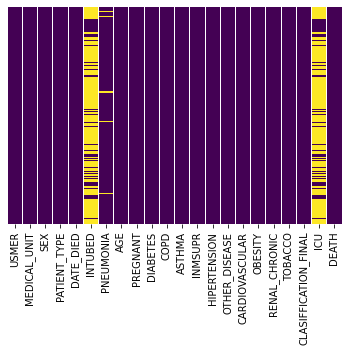

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df['PREGNANT'] = df['PREGNANT'].replace(97, 2)
df = df[(df.PREGNANT == 1) | (df.PREGNANT == 2)]

In [ ]:
df = df.drop(['ICU', 'INTUBED', 'DATE_DIED'], axis=1)

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(409409, 19)

## Standardization

In [ ]:
# scaler = StandardScaler()

In [ ]:
# scaler.fit_transform(df)

## Correlation

In [ ]:
# # plotting the heatmap
# plt.figure(figsize=(18,15))
# sns.heatmap(df.corr(),annot=True, fmt=".2f")
# plt.title("Correlation Between Features",fontsize=18,color="red");

In [ ]:
unrelevant_columns = ["SEX","PREGNANT","COPD","ASTHMA","INMSUPR","OTHER_DISEASE","CARDIOVASCULAR",
                      "OBESITY","TOBACCO"]

df.drop(columns=unrelevant_columns,inplace=True)

## Preparing non binary catagorical features

In [ ]:
df = pd.get_dummies(df,columns=["MEDICAL_UNIT","CLASIFFICATION_FINAL"],drop_first=True)

In [ ]:
df.head

<bound method NDFrame.head of         USMER  PATIENT_TYPE  PNEUMONIA  AGE  DIABETES  HIPERTENSION  \
0           2             1        1.0   65       2.0           1.0   
1           2             1        1.0   72       2.0           1.0   
2           2             2        2.0   55       1.0           2.0   
3           2             1        2.0   53       2.0           2.0   
4           2             1        2.0   68       1.0           1.0   
...       ...           ...        ...  ...       ...           ...   
421547      2             1        2.0   68       1.0           1.0   
421548      2             1        2.0   14       2.0           2.0   
421549      2             1        2.0   43       2.0           2.0   
421550      2             1        2.0   54       2.0           2.0   
421551      2             1        2.0   46       2.0           2.0   

        RENAL_CHRONIC  DEATH  MEDICAL_UNIT_2  MEDICAL_UNIT_3  ...  \
0                 2.0      1               0    

In [ ]:
df.to_csv('covid-clean-unnormalized.csv')